# Data Pipelines with Sklearn

We've seen time and time again, data is amazing.... ly messy. You can safely bet that you will always need to massage your data so that it is in the proper format you need to perform your analysis (unless you're using the Iris Dataset that is).



Data pipelines are a way to streamline your workflow. It allows you to automate several steps of the data processing and model creation. Additionally it also has the benefit of making your code cleaner, easier to understand and reproduce.

## Major steps in data processing

- Data Preprocessing

- Data Normalization and Standardization

- Feature Engineering and Selection

- Splitting Data into Train and Test Datasets

- Setting up an Algorithm and Model Fitting

- Model Evaluation and Selection

All of these steps can be added to your data pipeline object but not all are necessary. We'll look at a few examples of how to do this and why.

## Data preprocessing

It is an umbrella that covers all of the transformations that must be done on the data you're using.

We start with verifying the quality of the data by inspecting the numerical and categorical values, dealing with outliers and missing values, and dealing with duplicate or inconsistent values. Performing encoding or bucketing of values may be needed. Normalizing data, selecting or engineering features. 

All of this with the final goal of getting your data to a state that your algorithm is able to easily interpret your data and is able to create a model.

In [2]:
import pandas as pd

In [3]:
#Import the data :
df_loan = pd.read_csv('loan_data.csv')
df_loan.drop('Loan_ID', axis=1, inplace=True)

#What is the type for the Dependents column ?
print("\nType of data in dependents column: ",df_loan['Dependents'].dtype)
df_loan.head(10)


Type of data in dependents column:  object


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df_loan.Dependents.unique()

#Mmmmm.... we'll deal with this later

array(['0', '1', '2', '3+', nan], dtype=object)

In [5]:
#Check out the different types :
df_loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Let's see how amy unique values we have in each of our columns :
df_loan.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
#Check if we have any null values :
df_loan.isnull().values.any()

True

In [8]:
#Since we do, let's see how many in each column
df_loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Ok now that we've peaked at our data, let's start transforming the data into something that we can build an algorithm for to predict if the loan will be approved or not. This will be a classification problem with only two possible outcomes : Yes or No (the bank can't be coy and say maybe...)

The first thing we need to do is transform the value '3+' in the Dependents column to just 3.

To do this we need to construct a custom transformer function that will handle the data how we want. In this case we want to replace '3+' with just 3.

In [9]:
from sklearn.preprocessing import FunctionTransformer

#We define a custom function to do the transformation for us :
def custom_transformation(df):
    df['Dependents'] = df['Dependents'].replace('3+', '3')

#We create the FunctionTransformation object that we can then pass into our pipeline object :
ft = FunctionTransformer(func=custom_transformation, validate=False)

#We can fit the transform right away by itself or insert it into a Pipeline object.
ft.fit_transform(df_loan)

In [10]:
df_loan.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Data Normalization and Standardization

Data normalization and Standardization is routely done in order to improve numerical stability of our models. Certain models can be very sensitive to outliers or make certain assumptions about the data, like distribution.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Let's discuss what these packages are and why we care.

Pipeline : This will allow you to create the actual Pipeline object itself, which is a way to concetrate all of the preprocessing, model fitting and selection into a single (hopefully) smooth process.

SimpleImputer : This package allows you to deal with missing values and gives you several options when it comes to how you want to handle your missing data.

ColumnTransformer : This function will apply our diverse transforms to the columns we chose. Notice that we could have chosen to add our 'Dependents' data transformation inside of our pipeline here instead of applying it by itself.

OneHotEncoder : This will encode our categorical variables into 1s and 0s. Remember that one-hot-encoding should be used on categorical variables that are nominal or binary only. (If you're dealing with ordinal categorical variables you can use LabelEncoder from the package sklearn.preprocessing)

StandardScaler : This will allow you to scale your data to be within a certain range : min_val to max_val. Most commonly used to make data be between 0 and 1. There are many scalers that exist and their use will depend on your application (great non-answer again). If you would like to read up on some of the scalers available [this website](https://benalexkeen.com/feature-scaling-with-scikit-learn/) does a pretty good job at walking you through those.

In [12]:
#Now that we know what these packages are doing, let's select the data we want to trasnform.
#Let's extract the numeric and categorical column names from our dataframe.

#Numeric columns :
numFeatures = df_loan.select_dtypes(include=['int64', 'float64']).columns
print("Numeric features: ",numFeatures,"\n\n")
#Categorical columns :
catFeatures = df_loan.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns

print("Categorical Features: ",catFeatures)

Numeric features:  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object') 


Categorical Features:  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [13]:
# show standard scaler.  Now all columns are mean zero, standard deviation one
print(df_loan['ApplicantIncome'].describe())
temp = StandardScaler().fit_transform(df_loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']].values)
temp = pd.DataFrame(temp, index=df_loan.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])
temp.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,5.920000e+02,6.000000e+02,5.640000e+02
mean,-2.694189e-17,-3.977998e-18,1.659708e-17,-1.115774e-16,3.385787e-17
std,1.000815e+00,1.000815e+00,1.000846e+00,1.000834e+00,1.000888e+00
min,-8.606493e-01,-5.544873e-01,-1.606878e+00,-5.071764e+00,-2.310212e+00
25%,-4.138159e-01,-5.544873e-01,-5.427370e-01,2.766417e-01,4.328607e-01
50%,-2.606393e-01,-1.480047e-01,-2.153091e-01,2.766417e-01,4.328607e-01
75%,6.414426e-02,2.312023e-01,2.524450e-01,2.766417e-01,4.328607e-01
max,1.238462e+01,1.369617e+01,6.473575e+00,2.120919e+00,4.328607e-01


In [14]:
#Now we can finally build our first Pipeline. 
#Let's create the Pipeline for transforming our numeric data. We have to provide the steps we want to 
#execute in order. First replace NaNs and then scale the data.
numTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#There is also : sklearn.pipeline.make_pipeline which can also be used to create a Pipeline

In [15]:
#Now that we have the Pipeline for numerical data, let's do the same for categorical data.
catTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [16]:
#Now we want to be able to apply the preprossing transformations to the categorical and numerical Pipelines :
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numTransformer, numFeatures),
        ('cat', catTransformer, catFeatures)])

In [17]:
# df_loan.isnull().sum()
preprocessor.fit_transform(df_loan)

array([[ 0.07299082, -0.55448733, -0.21124125, ...,  0.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.03873155, -0.21124125, ...,  1.        ,
         0.        ,  0.        ],
       [-0.39374734, -0.55448733, -0.94899647, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.35706382, -0.55448733,  0.49081614, ...,  0.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.55448733, -0.15174486, ...,  0.        ,
         1.        ,  0.        ]])

## Feature Engineering, Selection and Dimentionality Reduction

This is the part where you would do variable/feature selection, which essentially just means choosing a subset of features from the ones you have available. This help improve accuracy when done well, will make your model train faster and help with overfitting

- Feature Engineering : create a new small subset of features that capture well the phenomena we're interested in in our data
- Feature Selection : keeps a subset of the original features.

Feature Engineering/Selection can help your algorithm go from not great to pretty amazing. This is particularly important when the number of features available is very large, especially if there aren't that many data points available. 

There are two types of feature selection strategies :

- Univariate Feature Selection : More manual, check each feature for correlation with outcome variable. This is easier to do if you have some domain knowledge about your data.

- Multivariate Feature Selection : When there are too many features, then we group together features at once. If you don't know a lot about the domain, this technique is more trustworthy.
    - There are 3 categories for Multivariate Feature Selection :
        - Filter Methods : check variance (set threshold), Pearson's correlation test and Linear Discriminant Analysis (LDA)
        
        - Wrapper Methods : Forwards Selection/Backwards Elimination
        
        - Embedded Methods : Lasso Regularization, Gradient Boosting Machine (GMB), Random Forest (RF)




- Linear discriminant analysis (LDA): 

    - We used LDA in Supervised Learning when features are labelled.
    
- Principal Component Analysis(PCA): The main purposes of a PCA are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

    - PCA will try to reduce dimensionality by exploring how one feature of the data is expressed in terms of the other features(linear dependency). Feature selection instead, takes the target into consideration.
    
    - PCA works best on dataset having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

We will cover Feature Engineering/Selection more in the next couple of weeks.

## Splitting Data into Train and Test Datasets

In [18]:
#sklearn has a package that lets you split your data into train/test sets :
from sklearn.model_selection import train_test_split

#We need to create our indepent features matrix and our dependent variable:
#Dependent variable : Loan Status (approved or not)
y = df_loan['Loan_Status']

#Remaining features are our independent variables :
X = df_loan.drop('Loan_Status', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


## Setting up an Algorithm and Model Fitting

Let's bring it all together ! We are going to use a Random Forest Classifier on our data.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [21]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [22]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                          

In [23]:
import numpy as np
X_train_test = X_train
hdsjldls = preprocessor.fit_transform(X_train_test)


print(np.any(np.isnan(hdsjldls)))
print(np.all(np.isfinite(hdsjldls)))

False
True


## Model Evaluation and Selection

The Pipeline approach allows us to exploit the streamlined preprocessing of the data allowing us to fit lots of different models on our data very quickly.

In [24]:
y_pred = rf.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y'], dtype=object)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test), "\n\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.756 


SVC(C=0.025, probability=True)
model score: 0.732 


NuSVC(probability=True)
model score: 0.829 


DecisionTreeClassifier()
model score: 0.699 


RandomForestClassifier()
model score: 0.772 


AdaBoostClassifier()
model score: 0.813 


GradientBoostingClassifier()
model score: 0.813 




We can also use cross validation inside of our pipeline :

In [26]:
from sklearn.model_selection import cross_val_score

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print(cross_val_score(pipe,X_train,y_train,cv=3,
    scoring='f1_micro'))

KNeighborsClassifier(n_neighbors=3)
[0.75       0.7804878  0.76687117]
SVC(C=0.025, probability=True)
[0.67682927 0.67682927 0.67484663]
NuSVC(probability=True)
[0.81707317 0.80487805 0.78527607]
DecisionTreeClassifier()
[0.71341463 0.65243902 0.67484663]
RandomForestClassifier()
[0.79878049 0.7804878  0.79141104]
AdaBoostClassifier()
[0.7195122  0.7195122  0.75460123]
GradientBoostingClassifier()
[0.75       0.71341463 0.76687117]


Last but not least, let's look at what an NLP pipeline might look like

In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Let's import some movie reviews :
movie_review = pd.read_csv('IMDB Dataset.csv')
movie_review.sentiment = movie_review.sentiment.map({"positive":1, "negative":0})
print(movie_review.head())

#X_train/X_test is a list of string representing documents
#y_train/y_test are the labels
from sklearn.model_selection import train_test_split

#Let's split our data into train/test data
X_train, X_test, y_train, y_test = train_test_split(
    movie_review['review'], 
    movie_review['sentiment'], 
    test_size = 0.3, random_state = 1)

# #calculates vector of term frequencies :
# vect = CountVectorizer()

# #normalizes term frequencies :
# tfidf = TfidfTransformer()

# #a linear SVM classifier :
# clf = LinearSVC()

#creating pipeline :
pipeline = Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf',LinearSVC())
])

#Using cross-validation :
scores = cross_val_score(pipeline,X_train,y_train,cv=3,scoring='f1_micro')
print("\nScores: ", scores)


FileNotFoundError: [Errno 2] No such file or directory: 'IMDB Dataset.csv'

In [ ]:
#We'll use this to check the result from out model
from sklearn.metrics import confusion_matrix

#Fitting the model :
pipeline.fit(X_train,y_train)

#Predicting on unseen data :
y_pred = pipeline.predict(X_test)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Normalized Confusion Matrix:\n",confusion_matrix(y_test,y_pred,normalize='all'))

Confusion Matrix:
 [[6694  827]
 [ 677 6802]]
Normalized Confusion Matrix:
 [[0.44626667 0.05513333]
 [0.04513333 0.45346667]]


### Another example
https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

In [ ]:
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [ ]:
# Read ecoli dataset from the UCI ML Repository and store in
# dataframe df
df = read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)
print(df.head())

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


We’ll ignore the first column, which specifies the sequence name. The last column is the class label. Let’s separate the features from the class label and split the dataset into 2/3 training instances and 1/3 test examples.

In [ ]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])
 
# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))
 
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=0)
 
print(X_train.shape)
print(X_test.shape)

(224, 7)
(112, 7)


Now we have 224 samples in the training set and 112 samples in the test set. We have chosen a small dataset so that we can focus on the concepts, rather than the data itself.

For this tutorial, we have chosen the k-nearest neighbor classifier to perform the classification of this dataset.

A Classifier Without a Pipeline and Optimization
First, let’s just check how the k-nearest neighbor performs on the training and test sets. This would give us a baseline for performance.

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9017857142857143
Test set score: 0.8482142857142857


### Setting Up a Machine Learning Pipeline
For this tutorial, we’ll set up a very basic pipeline that consists of the following sequence:

Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().

Feature selector: Use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.

Classifier: KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.

In [ ]:
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

The pipe object is simple to understand. It says, scale first, select features second and classify in the end. Let’s call fit() method of the pipe object on our training data and get the training and test scores.

In [ ]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


So it looks like the performance of this pipeline is worse than the single classifier performance on raw data. Not only did we add extra processing, but it was all in vain. Don’t despair, the real benefit of the pipeline comes from its tuning. The next section explains how to do that.

### Optimizing and Tuning the Pipeline
In the code below, we’ll show the following:

We can search for the best scalers. Instead of just the StandardScaler(), we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().

We can search for the best variance threshold to use in the selector, i.e., VarianceThreshold().

We can search for the best value of k for the KNeighborsClassifier().

The parameters variable below is a dictionary that specifies the key:value pairs. Note the key must be written, with a double underscore __ separating the module name that we selected in the Pipeline() and its parameter. Note the following:

The scaler has no double underscore, as we have specified a list of objects there.
We would search for the best threshold for the selector, i.e., VarianceThreshold(). Hence we have specified a list of values [0, 0.0001, 0.001, 0.5] to choose from.

Different values are specified for the n_neighbors, p and leaf_size parameters of the KNeighborsClassifier().

In [ ]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2],
	'classifier__leaf_size': [1, 5, 10, 15]
}

The pipe along with the above list of parameters are then passed to a GridSearchCV() object, that searches the parameters space for the best set of parameters as shown below:

In [ ]:
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

C:\Users\ddalton\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Training set score: 0.8928571428571429
Test set score: 0.8571428571428571


By tuning the pipeline, we achieved quite an improvement over a simple classifier and a non-optimized pipeline. It is important to analyze the results of the optimization process.

Don’t worry too much about the warning that you get by running the code above. It is generated because we have very few training samples and the cross-validation object does not have enough samples for a class for one of its folds.

### Analyzing the Results
Let’s look at the tuned grid object and gain an understanding of the GridSearchCV() object.

The object is so named because it sets up a multi-dimensional grid, with each corner representing a combination of parameters to try. This defines a parameter space. As an example if we have three values of n_neighbors, i.e., {1,3,5}, two values of leaf_size, i.e., {1,5} and two values of threshold, i.e., {0,0.0001}, then we have a 3D grid with 3x2x2=12 corners. Each corner represents a different combination.

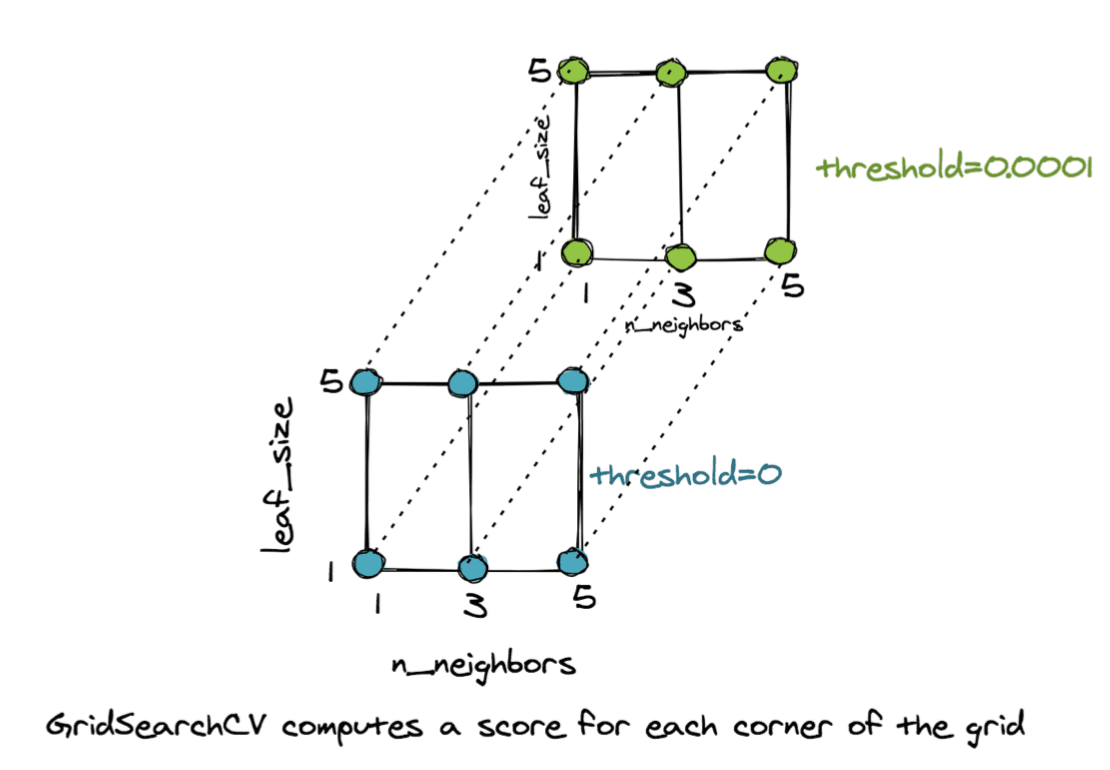

For each corner of the above grid, the GridSearchCV() object computes the mean cross-validation score on the unseen examples and selects the corner/combination of parameters that give the best result. The code below shows how to access the best parameters of the grid and the best pipeline for our task.



In [ ]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7))])


In [ ]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


This DataFrame is very valuable as it shows us the scores for different parameters. The column with the mean_test_score is the average of the scores on the test set for all the folds during cross-validation. The DataFrame may be too big to visualize manually, hence, it is always a good idea to plot the results. Let’s see how n_neighbors affect the performance for different scalers and for different values of p.

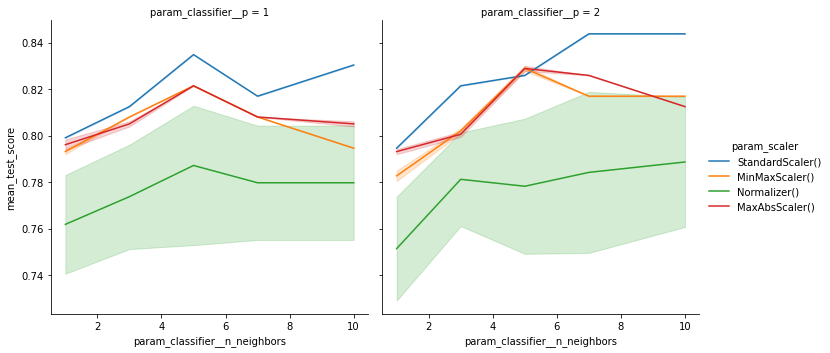

In [ ]:
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()

The plots clearly show that using StandardScaler(), with n_neighbors=7 and p=2, gives the best result. Let’s make one more set of plots with leaf_size.

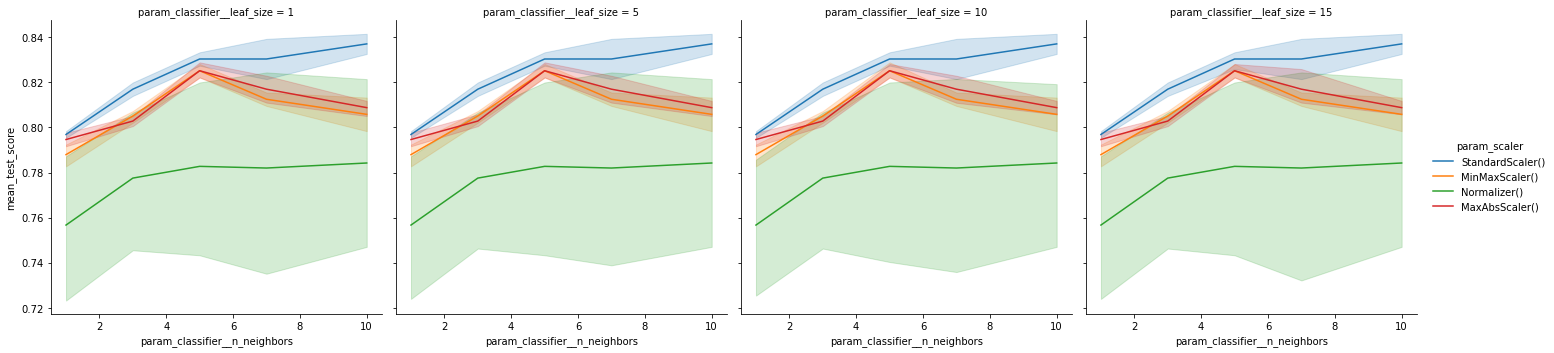

In [ ]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()